Solution 1

$P(S_L) = \int_{0}^{\infty}max(0,g_L(x))h(x)dx\\
       = \int_{0}^{\sqrt2+1}(1-(x-1)^2/2)e^{-x}dx  \\
       = \int_{0}^{\sqrt2+1}e^{-x}dx/2 - \int_{0}^{\sqrt2+1}e^{-x}x^2dx/2 + \int_{0}^{\sqrt2+1}e^{-x}xdx  \\
       =1/2-1/2e^{-a}+1/2e^{-a}a^2-1+a+2e^{-a}+1-a-2e^{-a} \\ 
       =1/2 +1/2(e^{-a}(a^2-1))  \\
       =1/2+(1+\sqrt2)e^{-1-\sqrt2}\\
       \approx 0.7159 \\ $  
       
$P(S_U) = \int_{0}^{\infty}min(1,g_U(x))h(x)dx\\
       = \int_{0}^{3}(1-(x-1)^2/2+(x-1)^4/8)e^{-x}dx  + \int_{3}^{\infty}e^{-x}dx\\
       \overset{useP(S_L)}{=} 1/2 +1/2(e^{-a}(a^2-1)) + \int_{-1}^{2}x^4/8*e^{-x}dx + e^{-3} \\
       = 1/2 +1/2(e^{-3}*8) + 9/8 - 21/e^3 + e^{-3}\\
       = 13/8 -17e^{-3} + e^{-3}\\
       = 13/8 -16e^{-3}\\
       \approx 0.8284 \\ $
  

Solution 2

1) Import settings

In [1]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.special import comb, perm
from scipy import stats
import numpy as np
import sys
import matplotlib.pyplot as plt
np.random.seed(250)


2) Define function

In [2]:

def sample_half_v3(N):
# N, 实际采样数
    k = 0  # 实际接受总数
    n = 0  # 实际计算g次数
    U = np.random.rand(N)  # 产生均匀分布
    X = [-np.log(u) for u in U]  # 产生服从h的随机变量X
    GL = [(1-(x-1)**2/2) for x in X]
    GU = [(1-(x-1)**2/2+(x-1)**4/8) for x in X]
    U = np.random.rand(N)  # 再次产生均匀分布
    for i in range(N):
        if U[i] <= GL[i]:  # 在gL发生的条件下接受
            X[k] = X[i]
            k = k + 1
        elif U[i] <= GU[i]:
            n = n + 1 # 计算g(X)
            if U[i] <= np.exp(-(X[i]-1)**2/2):
                X[k] = X[i]
                k = k + 1
    return k, X, n

3) Test and plot

Total calculate frequency:0.112548 vs theoriatical frequency 0.1125


Text(0.5,0,'Half Normal Distribution Samples Produced by 夹逼 Method')

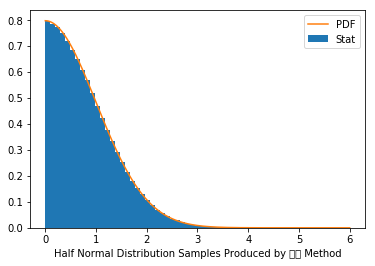

In [5]:
N = 1000000
k, X, n= sample_half_v3(N)
print(r"Total calculate frequency:%s vs theoriatical frequency 0.1125"%(n/N))
x = np.linspace(0,6,10000)
plt.hist(X[0:k], bins=50, normed=True, label=r"Stat");
plt.plot(x,np.sqrt(2/np.pi)*np.exp(-x**2/2), label=r"PDF")
plt.legend()
plt.xlabel(r"Half Normal Distribution Samples Produced by 夹逼 Method")